# ECE 140B: Lab 4
## Making my product smarter with ML

The backbone of many modern day smart IoT products is sophisticated predictive modeling and insightful Data Analytics. <br>
The motivation of this lab is to introduce you to very basic ML and show you how easily you can work with it in Python. <br>
We will use the Keras framework to recognize and classify handwritten digits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras import datasets

Using TensorFlow backend.


In [2]:
# Load the data
(xtrain, ytrain), (xtest, ytest) = datasets.mnist.load_data()

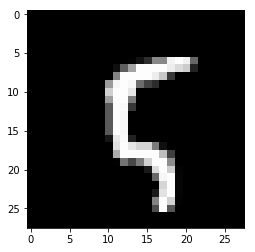

In [3]:
# Plot a sample image from the dataset
plt.imshow(xtrain[100], cmap='gray')
plt.show()

In [4]:
xtrain = np.expand_dims(xtrain, -1).astype(np.float32)
xtrain /= 255.0

# Represent the labels as one-hot encoded vectors.
ytrain_onehot = np.zeros((ytrain.shape[0], 10)).astype(np.float32)
for i in range(ytrain.shape[0]):
    ytrain_onehot[i, ytrain[i]] = 1

In [5]:
# Normalize pixel values to lie between [0,1]
xtest = xtest / 255.0
xtest = np.expand_dims(xtest, -1)

In [6]:
# Reshape to number_of_samples x number_of_pixels
xflat = xtrain.reshape(xtrain.shape[0], -1)

In [9]:
len(xtrain)

60000

In [7]:
# We will work with the Keras Sequential Model API
from keras.models import Sequential
from keras.layers import Flatten, Input, Dense

## Part 1: Logistic Regression

Logistic Regression is the most basic approach for Classification. <br>
We will create a basic Keras sequential model and add 10 neurons. Each of these neurons correspond to a digit between 0-9. Hence, the number of neurons should be equal to the number of classes, which is 10 in our case.

In [8]:
# Create a Sequential Model
model = Sequential()

Add a layer using `model.add(layer(..))`
We will use a Dense layer, which basically means that all neurons in the current layer will be connected to all the neurons from the previous layer.
We will work with the Softmax activation function. 
Read more about Softmax here: https://en.wikipedia.org/wiki/Softmax_function


In [9]:
model.add(Dense(10, activation = 'softmax'))

Now we will compile our model. In order to compile, we have to give 2 required arguments, which loss function to use and which optimizer to use. Since each neuron in our output layer fires with a probability between 0 to 1, we use the cross-entropy loss function. Adam is an optimization method which uses gradient descent and keeps track of previous gradients to find the best model parameters.

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


Now we will train out model. In order to train, we will call model.fit() API, and it's that simple! It requires the training data, the training labels, how many times to loop through the entire dataset (epochs), the batch size (how many number of samples to see in one iteration) We use a validation split = 0.2, i.e, we keep 20% of our data as validation data to see how our model is performing on samples it has not seen.

In [11]:
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 64, validation_split = 0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 22us/step - loss: 0.6087 - acc: 0.8451 - val_loss: 0.3517 - val_acc: 0.9059
Epoch 2/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.3442 - acc: 0.9056 - val_loss: 0.3036 - val_acc: 0.9168
Epoch 3/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.3095 - acc: 0.9149 - val_loss: 0.2873 - val_acc: 0.9204
Epoch 4/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.2931 - acc: 0.9187 - val_loss: 0.2792 - val_acc: 0.9211
Epoch 5/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.2834 - acc: 0.9206 - val_loss: 0.2716 - val_acc: 0.9254
Epoch 6/10
48000/48000 [==============================] - 1s 16us/step - loss: 0.2761 - acc: 0.9227 - val_loss: 0.2690 - val_acc: 0.9265
Epoch 7/10
48000/48000 [==============================] - 1s 16us/step - loss: 0

In [12]:
# What is the accuracy obtained on test data?
ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

Accuracy :-  92.63


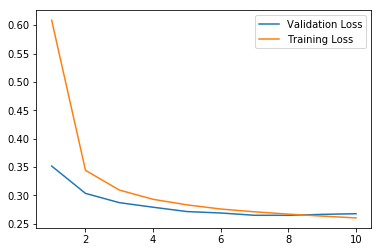

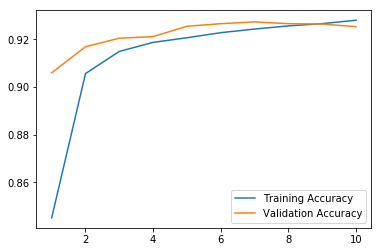

In [13]:
# Plots for losses and accuracies
x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

## Part 2: Neural Networks

In [14]:
model = Sequential()

# With Neural Networks, we can add many such Dense layers in between out input and output layers, 
# to learn even a more complex non-linear function.
# This is the hidden layer with 100 neurons and a ReLU activation function.
model.add(Dense(100, activation = 'relu', input_dim=784))

# The output layer. Same as Logistic Regression
model.add(Dense(10, activation = 'softmax'))

In [15]:
# We will use the same loss functions and optimizers
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [16]:
# Let's train our Neural Network!
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 64, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 33us/step - loss: 0.3476 - acc: 0.9032 - val_loss: 0.2001 - val_acc: 0.9445
Epoch 2/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.1658 - acc: 0.9528 - val_loss: 0.1427 - val_acc: 0.9595s - loss: 0.1759 - a
Epoch 3/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.1205 - acc: 0.9653 - val_loss: 0.1220 - val_acc: 0.9643
Epoch 4/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.0929 - acc: 0.9738 - val_loss: 0.1178 - val_acc: 0.9667
Epoch 5/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.0755 - acc: 0.9785 - val_loss: 0.1047 - val_acc: 0.9674
Epoch 6/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.0616 - acc: 0.9825 - val_loss: 0.0991 - val_acc: 0.9708
Epoch 7/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.0509 - acc: 0.9856 - val_lo

In [17]:
# Let's see how well our simple 2-layer Neural Network does
ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

Accuracy :-  97.61


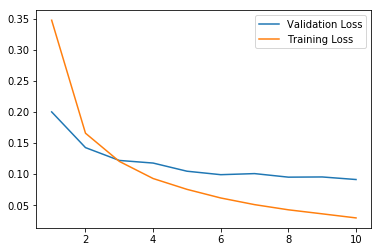

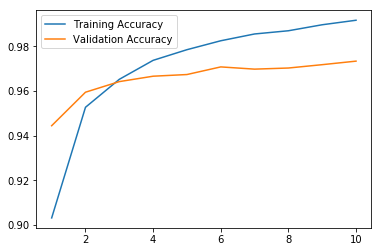

In [18]:
x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

# Question 3
Play Around with the Keras sequential API and add report the testing accuracies and plots for <br> 
- 3 layer Neural Network with 256 neurons in the first hidden layer (activation = relu), 100 neurons in the second (same, relu) and 10 neurons in the output layer.
- 3 layer Neural Network with 256 neurons in the first hidden layer (activation = tanh), 100 neurons in the second (same, tanh) and 10 neurons in the output layer.
- 3 layer Neural Network with 256 neurons in the first hidden layer (activation = relu), 100 neurons in the second (same, relu) and 10 neurons in the output layer. Play around with different batch sizes and see how it affects the performance. Try batch sizes of 32, 64 and 128.

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 61us/step - loss: 0.2638 - acc: 0.9226 - val_loss: 0.1235 - val_acc: 0.9646
Epoch 2/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.1027 - acc: 0.9690 - val_loss: 0.1170 - val_acc: 0.9635
Epoch 3/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0669 - acc: 0.9794 - val_loss: 0.0977 - val_acc: 0.9708
Epoch 4/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0476 - acc: 0.9850 - val_loss: 0.0819 - val_acc: 0.9764
Epoch 5/10
48000/48000 [==============================] - 2s 52us/step - loss: 0.0349 - acc: 0.9888 - val_loss: 0.0973 - val_acc: 0.9729
Epoch 6/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.0268 - acc: 0.9905 - val_loss: 0.0983 - val_acc: 0.9745
Epoch 7/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.1099 - val_acc

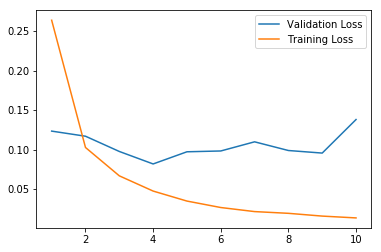

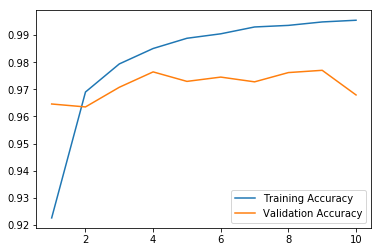

In [19]:
model = Sequential()

# first hidden layer w/ 256 neurons and relu outputting 100 neurons
model.add(Dense(256, activation = 'relu', input_dim=784))

# second hidden layer w/ 100 neurons and relu outputting 10 neurons
model.add(Dense(100, activation = 'relu'))

# output layer
model.add(Dense(10, activation = 'softmax'))

# use cross entropy for loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# train network
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 64, validation_split = 0.2)

ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 57us/step - loss: 0.2902 - acc: 0.9138 - val_loss: 0.1647 - val_acc: 0.9542
Epoch 2/10
48000/48000 [==============================] - 3s 54us/step - loss: 0.1386 - acc: 0.9587 - val_loss: 0.1205 - val_acc: 0.9629
Epoch 3/10
48000/48000 [==============================] - 2s 52us/step - loss: 0.0933 - acc: 0.9718 - val_loss: 0.1088 - val_acc: 0.9659
Epoch 4/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.0670 - acc: 0.9795 - val_loss: 0.0924 - val_acc: 0.9708
Epoch 5/10
48000/48000 [==============================] - 3s 56us/step - loss: 0.0493 - acc: 0.9852 - val_loss: 0.0909 - val_acc: 0.9738
Epoch 6/10
48000/48000 [==============================] - 2s 52us/step - loss: 0.0356 - acc: 0.9895 - val_loss: 0.0936 - val_acc: 0.9720
Epoch 7/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0288 - acc: 0.9918 - val_loss: 0.0885 - val_acc

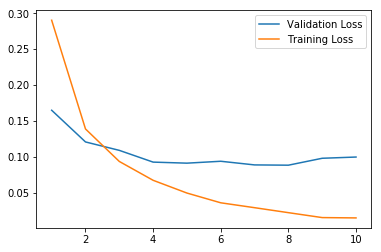

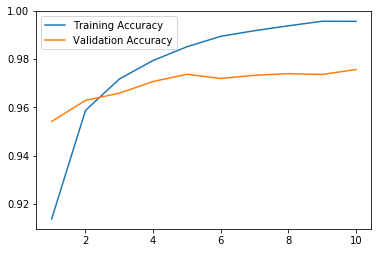

In [20]:
model = Sequential()

# first hidden layer w/ 256 neurons and tanh outputting 100 neurons
model.add(Dense(256, activation = 'tanh', input_dim=784))

# second hidden layer w/ 100 neurons and tanh outputting 10 neurons
model.add(Dense(100, activation = 'tanh'))

# output layer
model.add(Dense(10, activation = 'softmax'))

# use cross entropy for loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# train network
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 64, validation_split = 0.2)

ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 90us/step - loss: 0.2321 - acc: 0.9311 - val_loss: 0.1373 - val_acc: 0.9579
Epoch 2/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.0956 - acc: 0.9705 - val_loss: 0.0971 - val_acc: 0.9706
Epoch 3/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0639 - acc: 0.9805 - val_loss: 0.0926 - val_acc: 0.9718
Epoch 4/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.0470 - acc: 0.9849 - val_loss: 0.0868 - val_acc: 0.9766
Epoch 5/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.0349 - acc: 0.9885 - val_loss: 0.1079 - val_acc: 0.9711
Epoch 6/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.0296 - acc: 0.9904 - val_loss: 0.1104 - val_acc: 0.9725
Epoch 7/10
48000/48000 [==============================] - 6s 119us/step - loss: 0.0252 - acc: 0.9916 - val_loss: 0.1064 - val_ac

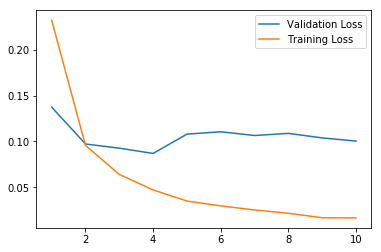

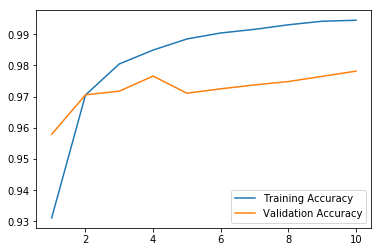

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0919 - val_acc: 0.9810
Epoch 2/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0942 - val_acc: 0.9808
Epoch 3/10
48000/48000 [==============================] - 2s 49us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.0953 - val_acc: 0.9827
Epoch 4/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.1072 - val_acc: 0.9796
Epoch 5/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.0186 - acc: 0.9939 - val_loss: 0.1115 - val_acc: 0.9792
Epoch 6/10
48000/48000 [==============================] - 2s 47us/step - loss: 0.0061 - acc: 0.9980 - val_loss: 0.1133 - val_acc: 0.9781
Epoch 7/10
48000/48000 [==============================] - 2s 48us/step - loss: 0.0056 - acc: 0.9980 - val_loss: 0.1122 - val_acc

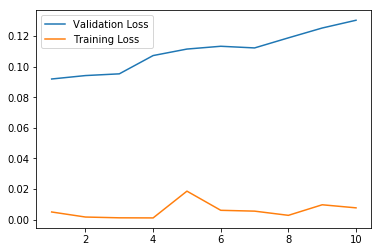

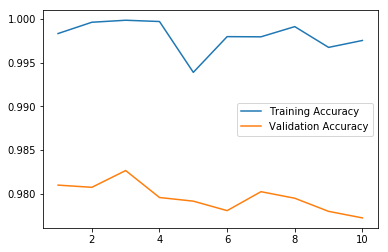

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 50us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.1106 - val_acc: 0.9810
Epoch 2/10
48000/48000 [==============================] - 2s 47us/step - loss: 3.1537e-04 - acc: 0.9999 - val_loss: 0.1094 - val_acc: 0.9816
Epoch 3/10
48000/48000 [==============================] - 2s 34us/step - loss: 1.1345e-04 - acc: 1.0000 - val_loss: 0.1061 - val_acc: 0.9815
Epoch 4/10
48000/48000 [==============================] - 2s 34us/step - loss: 6.1927e-05 - acc: 1.0000 - val_loss: 0.1065 - val_acc: 0.9817
Epoch 5/10
48000/48000 [==============================] - 2s 37us/step - loss: 4.7867e-05 - acc: 1.0000 - val_loss: 0.1071 - val_acc: 0.9821
Epoch 6/10
48000/48000 [==============================] - 2s 34us/step - loss: 3.9553e-05 - acc: 1.0000 - val_loss: 0.1074 - val_acc: 0.9822
Epoch 7/10
48000/48000 [==============================] - 2s 33us/step - loss: 3.2826e-05 - acc: 1.0000 - va

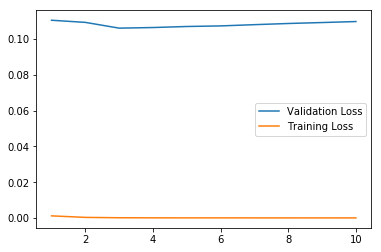

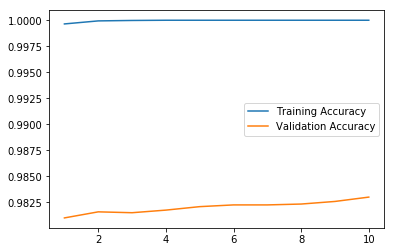

In [21]:
model = Sequential()

# first hidden layer w/ 256 neurons and relu outputting 100 neurons
model.add(Dense(256, activation = 'relu', input_dim=784))

# second hidden layer w/ 100 neurons and relu outputting 10 neurons
model.add(Dense(100, activation = 'relu'))

# output layer
model.add(Dense(10, activation = 'softmax'))

# use cross entropy for loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

# train network WITH BATCH SIZE = 32
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 32, validation_split = 0.2)

ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

# train network WITH BATCH SIZE = 64
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 64, validation_split = 0.2)

ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()

# train network WITH BATCH SIZE = 128
hist = model.fit(xflat, ytrain_onehot, epochs = 10, batch_size = 128, validation_split = 0.2)

ypred = model.predict(xtest.reshape(-1, 784))
print("Accuracy :- ", 100 * np.mean(np.argmax(ypred, 1) == ytest))

x = np.linspace(1, 10, 10)

plt.plot(x, hist.history["val_loss"], label = "Validation Loss")
plt.plot(x, hist.history["loss"], label = "Training Loss")
plt.legend()
plt.show()

plt.plot(x, hist.history["acc"], label = "Training Accuracy")
plt.plot(x, hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()